# Descriptive analysis

## Introduction

This jupyter notebook file contains the descriptive analysis on Yelp Data targeting to find out how important the star rate in Restaurant & Cafe Industry.

It compares the star rate with different sides of given dataset such as Attributes, Brands, Location and etc. with the aim to answer on the main question.

## Analysis

### Attributes

In [1]:
#Library section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

Now is the time to transform our piece of data into insightful information. 

Just as a reminder our purpose is to find out how star rate is important for business running in Restaurant & Cafe industry. 

In [2]:
rest = pd.read_csv('restaurants_business.csv')
#rest.stars = rest.stars.astype(int)
attributes = pd.read_csv('attributes_unpacked_business.csv')

First, we will filter our restaurant data frame and secondly merge it with our attribute DF named "work_df".

In [3]:
rest_df = rest[['business_id','name','cat_clean','is_open','city','state','latitude', 'longitude','stars','review_count','postal_code']]
rest_df.head(1)

,business_id,name,cat_clean,is_open,city,state,latitude,longitude,stars,review_count,postal_code
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,"specialty food, restaurants, dim sum, imported...",1,Mississauga,ON,43.605499,-79.652289,2.5,128,L5R 3E7


In [4]:
work_df = pd.merge(attributes,rest_df,on =  'business_id', how = 'left')
work_df.shape

(39249, 46)

Lets see how the distribution of stars looks like.

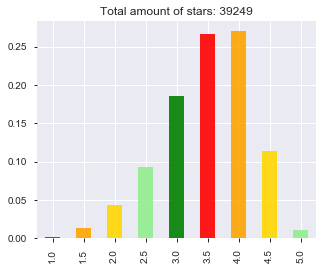

In [5]:
color = ['red', 'orange', 'gold', 'lightgreen', 'green']
work_df.stars.value_counts(normalize = True).sort_index().plot.bar(color=color, alpha = 0.9,figsize = (5,4))
plt.title(f'Total amount of stars: {work_df.stars.value_counts().sum()}')
plt.show()

The distribution of stars looks quite normal, however, it is not really needed to work with float numbers such as 1.5, 2.5 and etc. Thus we will simply transform this into whole numbers and will have star rate from 1 to 5. Of course in this case we will have a data loss, but that is fine in this case.

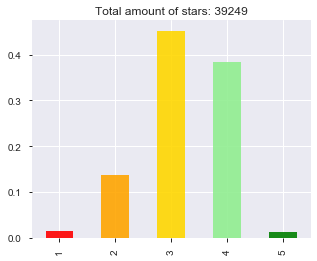

In [6]:
work_df.stars = work_df.stars.astype(int)
work_df.stars.value_counts(normalize = True).sort_index().plot.bar(color=color, alpha = 0.9,figsize = (5,4))
plt.title(f'Total amount of stars: {work_df.stars.value_counts().sum()}')
plt.show()

Now it looks much easier to work with. So we could see that mostly people rate businesses in the food industry with 3 stars and then 4 stars, while just few had given maximum rate. The next step is to create dummy variables for each star in order to see the correlation of other features to each star, however first we will check if there is any significant correlation to star rate in general. Before creating correlation matrix, first we will drop unneccessary columns for our current analysis such as longtitute and latitude and etc. Secondly, we need to encode categorical variables to numeric format.

In [7]:
# dropping irrelevant columns
for_star_cor_df = work_df.drop( ['business_id','cat_clean','latitude','longitude'  ], axis = 1)

# Feature Engenering: creating new columns that will contain encoded view of non-numeric variables
for i in for_star_cor_df.loc[:,for_star_cor_df.dtypes == object]:
    for_star_cor_df[i+'_codes'] = pd.factorize(for_star_cor_df[i])[0]+1

for_star_cor_df.sample(2).iloc[:,-8:]

,Alcohol_codes,NoiseLevel_codes,RestaurantsAttire_codes,WiFi_codes,name_codes,city_codes,state_codes,postal_code_codes
3476,2,1,1,1,2969,24,1,1494
25193,2,2,1,2,18533,23,3,341


Time to build correlation matrix.

In [8]:
cor_mat_start = for_star_cor_df.corr()#
#cor_mat = cor_mat_start['stars']
cor_mat = cor_mat_start.iloc[9:, 9:] # Exclud dummy stars
#cor_mat = cor_mat_start.iloc[19:, 9:].iloc[7:, :-10]
cor_mat = cor_mat[(cor_mat>0.3) |(cor_mat<-0.3)]#.iloc[:, :-10] 
cor_mat = cor_mat[cor_mat != 1].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)
sns.set(font_scale=1.4) 

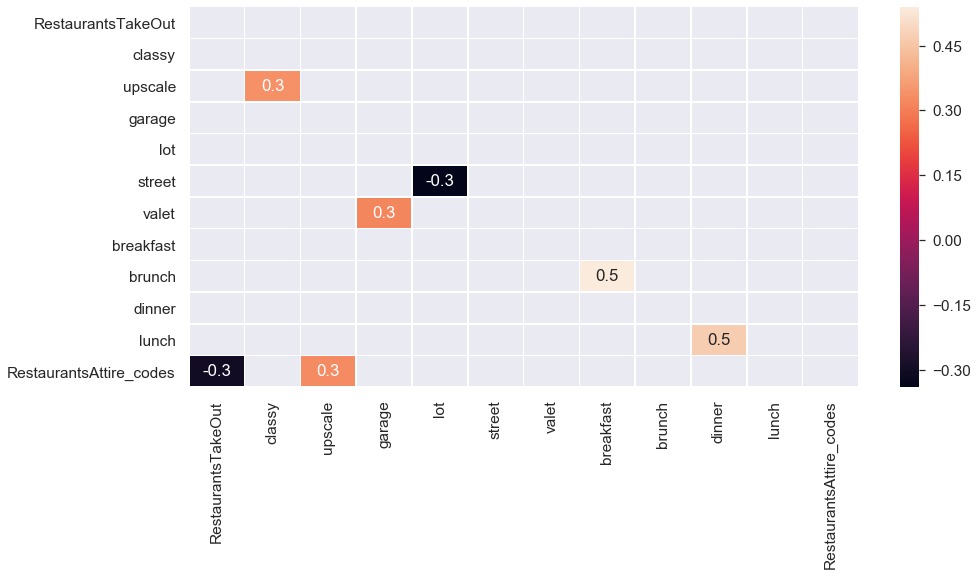

In [9]:
fig, ax = plt.subplots(figsize=(15,7))     
matrix = np.triu(cor_mat)
ax = sns.heatmap(round(cor_mat,2), annot=True, fmt = '.0g', mask=matrix, linewidths=.5)#, center = 0, ax  = ax, vmax =1, vmin = -1)

Above matrix represents only correlated features with cor.score <-0.3 and cor.score>0.3. As it can be noticed our target variable 'stars' did not appear at all. In other words, there is no tight correlation to our target feature, however before giving up, let's plot several features and their correlation to stars.

In [10]:
# Creating cor df for internal purposes
"""
matrix_with_interesting_values = cor_mat[cor_mat != 1].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)#.fillna('')
masky = masky = np.tril(matrix_with_interesting_values)
cor_up_mat = pd.DataFrame(data = masky, columns = matrix_with_interesting_values.columns, index = matrix_with_interesting_values.index )
cor_up_mat = cor_up_mat[cor_up_mat != 0].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0).fillna('')
cor_up_mat

for_pair_plot_clms = pd.unique(cor_up_mat.index.append(cor_up_mat.columns))

print(for_star_cor_df.RestaurantsAttire.unique(),for_star_cor_df.RestaurantsAttire_codes.unique() )
print(for_star_cor_df.RestaurantsPriceRange2.unique())

for_star_cor_df.RestaurantsAttire.value_counts()
"""

"\nmatrix_with_interesting_values = cor_mat[cor_mat != 1].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)#.fillna('')\nmasky = masky = np.tril(matrix_with_interesting_values)\ncor_up_mat = pd.DataFrame(data = masky, columns = matrix_with_interesting_values.columns, index = matrix_with_interesting_values.index )\ncor_up_mat = cor_up_mat[cor_up_mat != 0].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0).fillna('')\ncor_up_mat\n\nfor_pair_plot_clms = pd.unique(cor_up_mat.index.append(cor_up_mat.columns))\n\nprint(for_star_cor_df.RestaurantsAttire.unique(),for_star_cor_df.RestaurantsAttire_codes.unique() )\nprint(for_star_cor_df.RestaurantsPriceRange2.unique())\n\nfor_star_cor_df.RestaurantsAttire.value_counts()\n"

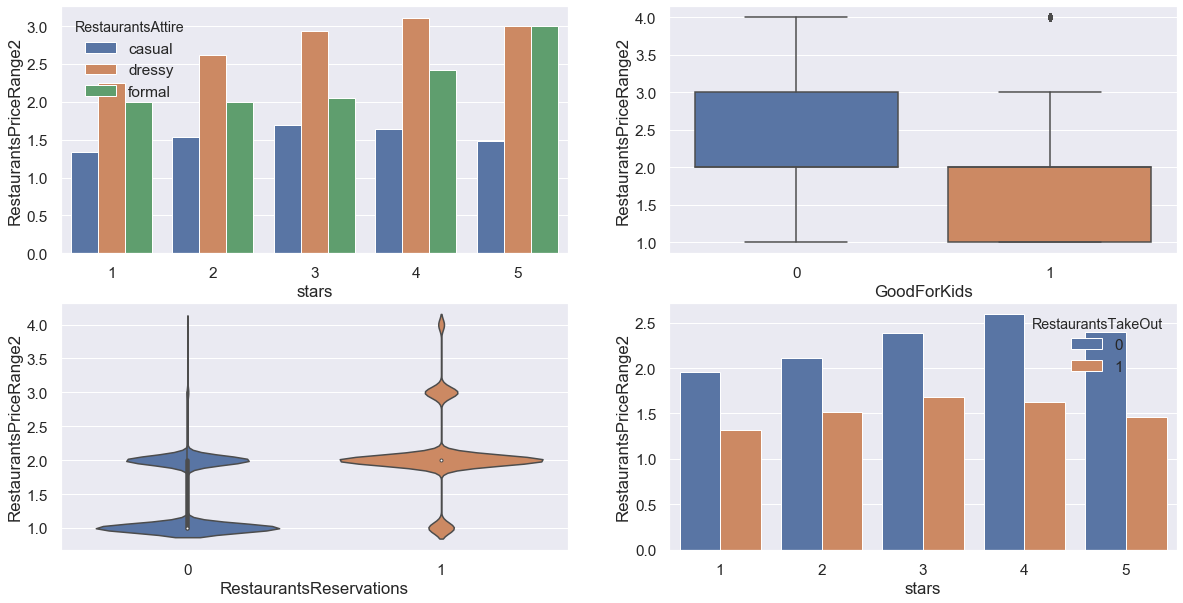

Price Rnage Scale
[1.0, 2.0, 3.0, 4.0]


In [11]:
f, axes = plt.subplots(2,2, figsize =(20,10))


current_palette = sns.color_palette()
ax = sns.barplot(data = for_star_cor_df, x = 'stars', y =  'RestaurantsPriceRange2', ci= None, hue = 'RestaurantsAttire', ax = axes[0,0])#, height = 7 )
#ax.set_title("Comparisson plot of Restaurant Price, Star rate and Attire")
#ax.fig.suptitle("Comparisson plot of Restaurant Price, Star rate\n and Attire")
#ax.despine(left=True)
#sns.regplot(data = for_star_cor_df[for_star_cor_df.RestaurantsAttire == 'casual'], x ='stars', y ='RestaurantsPriceRange2', scatter =False, color ='blue' , ax = axes[0,0])
#sns.regplot(data = for_star_cor_df[for_star_cor_df.RestaurantsAttire == 'dressy'], x ='stars', y ='RestaurantsPriceRange2', scatter =False, color ='orange' , ax = axes[0,0])
#sns.regplot(data = for_star_cor_df[for_star_cor_df.RestaurantsAttire == 'formal'], x ='stars', y ='RestaurantsPriceRange2', scatter =False, color ='green' , ax = axes[0,0])

#Good For kids
sns.boxplot(data = for_star_cor_df, x = 'GoodForKids', y = 'RestaurantsPriceRange2', ax = axes[0,1])


#Restaurants Reservations
sns.violinplot(data = for_star_cor_df, x = 'RestaurantsReservations', y = 'RestaurantsPriceRange2',  ax = axes[1,0])

#TakeAway
sns.barplot(data= for_star_cor_df, x = 'stars', hue = 'RestaurantsTakeOut', y = 'RestaurantsPriceRange2', ci  = None, ax = axes [1,1])
plt.show()
print('Price Rnage Scale')
a =list(for_star_cor_df.RestaurantsPriceRange2.unique())
a.sort()
print(a)

Plot above does not provide us with 'Oh my God!!!' Insight, but still we could make some conclusion out of it. These four plots represent the relationship between several features to Price Range (appeared on y-axis and having a scale from 1 to 4) and to stars. So, lets concider one by one:

1. In the top left corner on x-axis is number of stars assigned to different Attire type (casual, dressy and formal). From this chart it can be noticed, that business units having dressy and formal clothes type with higher prices tend to have higher star rates. On the opposite, we do not observe the same trend for casual Attire type. 

2. On neighbour top chart x-axis has a boolean value, stating weather the place is good for kids or not. So places that are not good for kids tend to be more expensive then the opposite.

3. The chart in the left bottom represents the possibility to reserve the space in the restaurant. Minor, but still majority of places that has this option tend to be a bit more expensive.

4. Final plot, that shows the opportunity for the user to take away the food is very similar to the 1st one. Places that does not have this option tend to have higher star rates, while food spots without this feature reminds normal distribution plot with low kurtosis level and does not have the similar trend.

The take away from these 4 plots is that food spots having more formal clothes, not good for kids, have a reservation and does not have option to take away the food tend to get higher star rates while their price rate goes up. So in other words, 'royal' restaurants have a positive correlation to amount of stars. The other insight is there is no actual trend for food places with opposite features.

_____________________________________________________________________________________________________________________________________________________

### Brand name


In this chapter we will explore top businesses from our data set and see how their star rating picture looks like.

First, we will subset top 15 companies based on amount of reviews and units and identify our leaders.

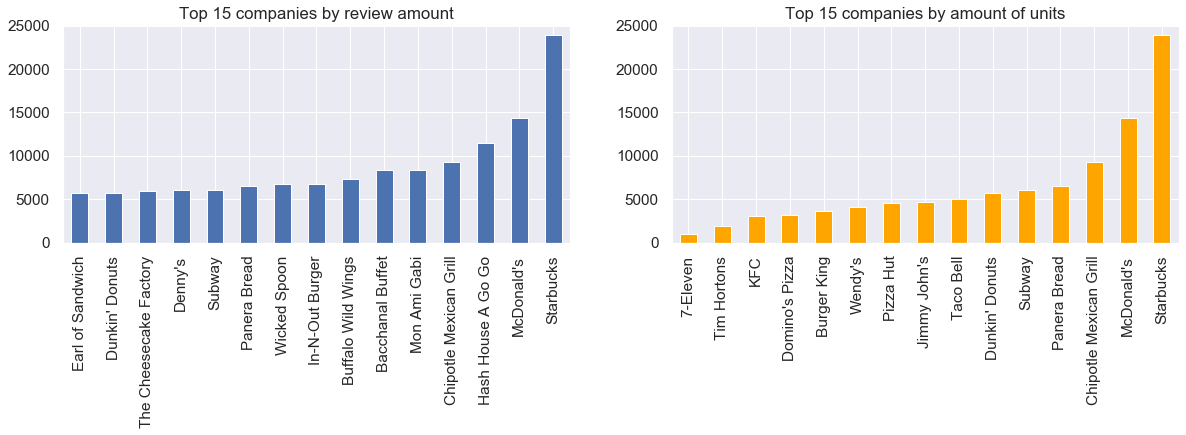

In [12]:
f = plt.figure(figsize =(20,4))


#Top 15 by reviews amount
plt.subplot(1,2,1)
rest_df.groupby('name')['review_count'].sum().sort_values(ascending = False).head(15).sort_values(ascending = True).plot.bar()
plt.title ('Top 15 companies by review amount')
plt.xlabel('')

# Top 15 by Units
plt.subplot(1,2,2)
top_15_biggest = rest_df.name.value_counts().head(15).index
top15_big_df= rest_df.loc[rest_df.name.isin (top_15_biggest)]
top15_big_df.groupby('name')['review_count'].sum().sort_values(ascending=True).plot.bar(color = 'orange')
plt.title('Top 15 companies by amount of units')
plt.xlabel('')
plt.show()

So by a landside Starbucks is taking the first place in both charts. McDonalds is also present in both plots by occupying the second place. There are also well known brands such as Pizza Hut, Burger King, KFC and Taco Bell, however seems to be that these were not very active in Social media, while data was collected, and probably that is why these are not present on the left plot. 

Alright, Starbucks is our leader for today in terms of quantity, however let's check other important factor such as quality and compare our brands in terms of mean star rates. Thus, to make the second competition fair enough we will plot mean star rates for each participant. 

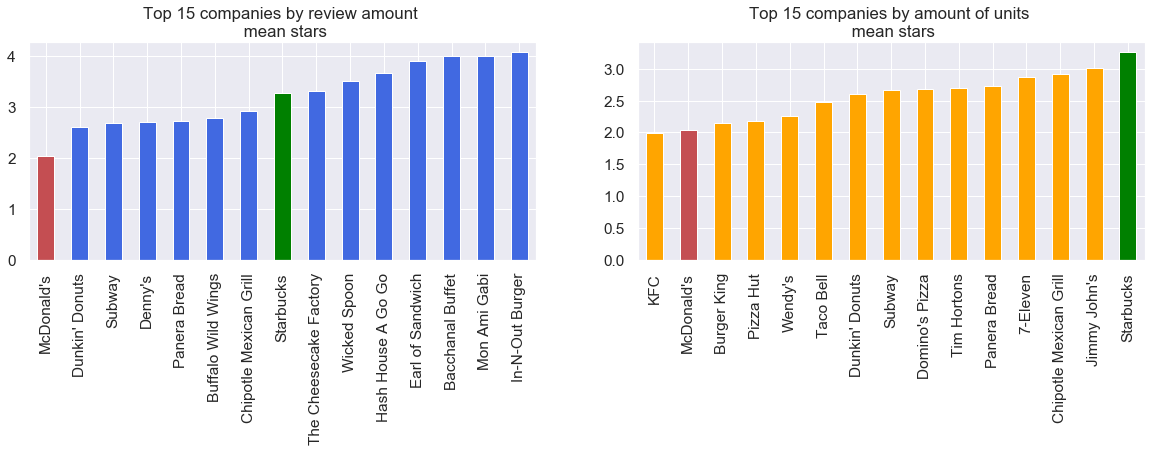

In [13]:
f = plt.figure(figsize =(20,4))

# top 15 review amount
plt.subplot(1,2,1)
top15_by_rev_df_names = rest_df.groupby('name')['review_count'].sum().sort_values(ascending = False).head(15).sort_values(ascending = True).index #company names
top15_by_rev_df = rest_df.loc[rest_df.name.isin (top15_by_rev_df_names)] # filtered df with top 15 company names
df1 = top15_by_rev_df.groupby('name')['stars'].mean().sort_values(ascending = True)
colors_df1 = ['r' if x == "McDonald's" else 'green' if x == "Starbucks" else "royalblue"  for x in df1.index ]
df1.plot.bar(colors = colors_df1)
plt.title ('Top 15 companies by review amount \n mean stars')
plt.xlabel('')

#Top 15 amount of units
plt.subplot(1,2,2)
df2 = top15_big_df.groupby('name')['stars'].mean().sort_values(ascending = True)
colors_df2 = ['r' if x == "McDonald's" else 'green' if x == "Starbucks" else "orange"  for x in df2.index ]
df2.plot.bar(color = colors_df2)
plt.title('Top 15 companies by amount of units \n mean stars')
plt.xlabel('')
plt.show()

Now we have two plots sharing the same y-axis, which is standing for averahe stars. On the left side top 15 companies by review amount and the neighboring stands for amount of business units. 

'Mean stars' plots show us the totally different picture. Two leaders from previous competition (These are marked with different colors: Starbucks = green & McDonald's = red) slightly changing their positions. Well Starbucks is still keeping the first position among big players, however at the same time made 7 steps back on the left chart and gave the top place to In-N-Out Burger. 

There is a probability that smaller businesses tend to have higher star rate. Let's check the hypothesis first based on on our top 15 companies and then on the whole dataset.

In [14]:
df_top_mean_stars = pd.merge(top15_by_rev_df.name.value_counts().to_frame(), df1.to_frame(), left_index=True, right_index=True )
df_top_mean_stars = pd.merge(df_top_mean_stars,top15_by_rev_df.groupby('name')['review_count'].sum().to_frame(), left_index=True, right_index=True)
df_top_mean_stars = df_top_mean_stars.reset_index()
df_top_mean_stars.columns = ['name','n_units', 'stars_mean','review_count']
round(df_top_mean_stars.corr(),2)
df_top_mean_stars.sort_values(by = 'stars_mean', ascending = False)

,name,n_units,stars_mean,review_count
8,In-N-Out Burger,33,4.060606,6800
13,Mon Ami Gabi,1,4.000000,8348
14,Bacchanal Buffet,1,4.000000,8339
11,Earl of Sandwich,5,3.900000,5712
10,Hash House A Go Go,6,3.666667,11534
12,Wicked Spoon,1,3.500000,6708
9,The Cheesecake Factory,16,3.312500,6002
0,Starbucks,1066,3.257036,23880
3,Chipotle Mexican Grill,183,2.915301,9266
7,Buffalo Wild Wings,66,2.780303,7308


In [15]:
round(df_top_mean_stars.corr(), 2)

,n_units,stars_mean,review_count
n_units,1.00,-0.52,0.72
stars_mean,-0.52,1.00,-0.09
review_count,0.72,-0.09,1.00


Above is the correlation matrix that shows the relation between generated columns for our top 15 companies such as: number of business units, mean stars and number of reviews. It could be noticed that stars_mean and n_units has negative correlation scoring -0.5. It means that more business units lead to lower average star rate and vise versa. So based on our top 15 companies sample, our hypothesis is not wrong. However, to be sure, we will execute the same aggregation for the whole population and see if it will be confirmed.

In [16]:
import seaborn as sns
short_df = rest_df[['name', 'stars', 'review_count']]
main_staff = {'name': ['count'],'stars':['mean'], 'review_count': ['sum']}
short_df.name.value_counts()
short_df = short_df.groupby('name').agg(main_staff)
short_df.columns = ['n_units','star_means', 'review_count']
short_df['star_means'] = round(short_df['star_means']).astype(int)
short_df.sort_values(by = 'n_units',ascending = False).head(5)

,n_units,star_means,review_count
name,,,
Starbucks,1066,3,23880
McDonald's,806,2,14328
Subway,768,3,6114
Pizza Hut,320,2,4586
Taco Bell,313,2,5034


In [17]:
short_df.corr()

,n_units,star_means,review_count
n_units,1.000000,-0.044480,0.543175
star_means,-0.044480,1.000000,0.027001
review_count,0.543175,0.027001,1.000000


For the whole population the picture is different. Even thought the correlation is still negative, however it is quite close to zero. Before making the final conclusion, we will consider the amount of units as groups and calculate the mean of stars for each and check how data is distributed.

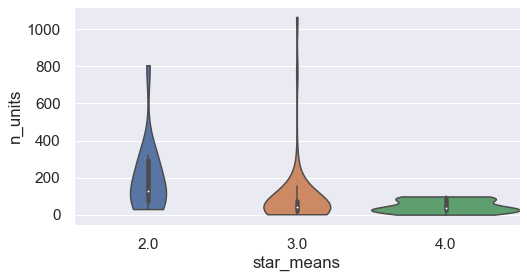

In [18]:
units_vs_star_means = short_df.groupby('n_units')['star_means'].mean().to_frame() 
units_vs_star_means = units_vs_star_means.reset_index()

plt.figure(figsize = (8,4))
sns.violinplot(data =round(units_vs_star_means), y = 'n_units', x = 'star_means',scale = 'area', cut = 0, width = 1)

From the violin plot we could see that businesses with average 4 stars are allocating before approximately 100 units line. At the same time while the number of stars starts to go down, the mean for amount of units goes up. The following observation does not have an obvious nature, however still it is as it is. Thus with not 100% probability, but it could be stated that the hypothesis is not wrong.

Alright, is there anything else we could compare to star rate? Yes, we have column named 'is_open', which stands for is the business unit is closed or open. Our hypothesis would be that business closing happens because of big amount of unhappy customers and hence low star rate. 

First, we will check the distribution of stars for open and closed units.

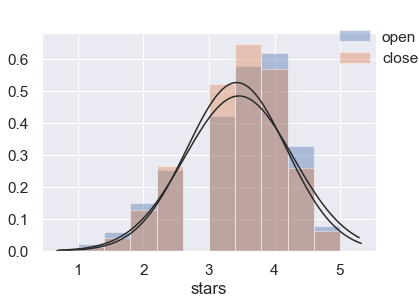

In [19]:
from scipy import stats

fig = plt.figure(figsize=(6,4))
is_open = rest_df[rest_df.is_open == 1]
is_close = rest_df[rest_df.is_open == 0]
sns.distplot(is_open['stars'], hist = True, kde= False, fit = stats.norm, bins = 10, label = ['open'])
sns.distplot(is_close['stars'], hist = True,kde= False, fit = stats.norm, bins = 10, label = ['close'])
fig.legend(bbox_to_anchor=(1, 1))


The data for both elements distributed quite normal and results are very close to each other. There is a difference that for open businesses bars from 4 to 5 stars are a bit higher and for closed the same situation with 3 to 4 stars. However the distinction is very minor, so from this picture we can not support our hypothesis. 

In [20]:
top15_big_df.stars = top15_big_df.stars.astype(int)

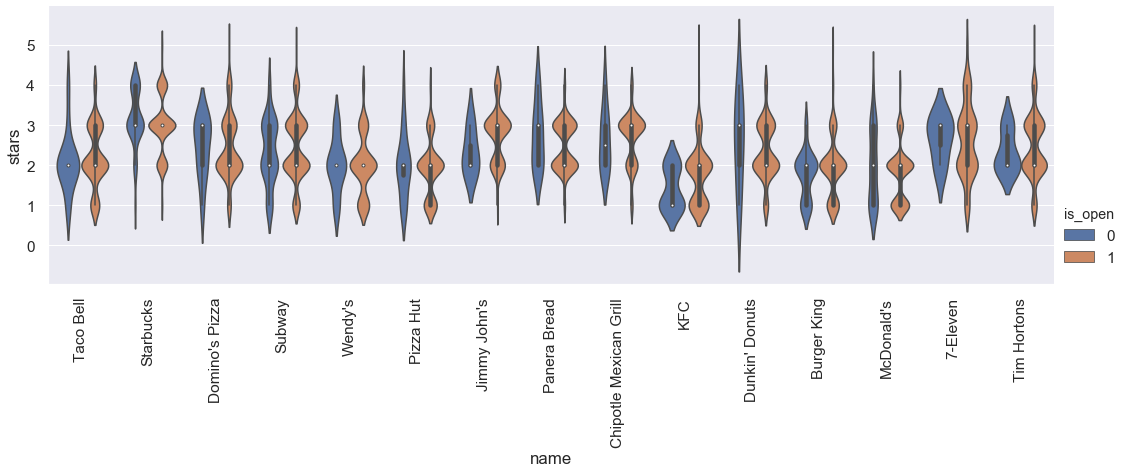

In [21]:
chart= sns.catplot(data = top15_big_df, x ='name', hue= 'is_open',y = 'stars', kind = 'violin', height = 5, aspect = 3)
#plt.legend(title = 'Is open:', labels = ['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
chart.set_xticklabels( rotation=90)
plt.show(chart)

From the above plot it can be seen that in some cases closed businesses had even though in average higher star rates then the open ones. This context, for instance, is overmatched for brand named 7-Eleven. 

Thus, we could claim, that our hypothesis is wrong.

In [22]:
rest.cat_clean.head()

0    specialty food, restaurants, dim sum, imported...
1                    sushi bars, restaurants, japanese
2    restaurants, breakfast & brunch, mexican, taco...
3           italian, restaurants, pizza, chicken wings
4                                 restaurants, italian
Name: cat_clean, dtype: object

_______________________________________________________________________________________________________________________________________________________

### Location 

In this chapter we will take a look on our dataset from the location perspective and see which kind of insights it is possible to get. Due to the issue that the prior focus of this research is on star rates, thus we will do some feature engineering and create the new data frame that will demonstrate how stars are distributed among top 15 cities based on amount of units.

In [23]:
# Converting stars to whole numbers as traditionally
rest_df1 = rest_df
rest_df1['stars'] = rest_df1['stars'].astype(int)

#Feature engeneering - filtering out city and stars and creating new column with value_counts fro stars for filtering our data frame afterwards
cit_star = rest_df1[['city','stars']]
counts = cit_star.city.value_counts().to_frame()
counts = counts.reset_index()
counts.columns = ['city','value_counts']
cit_star = cit_star.merge(counts, left_on = 'city', right_on = 'city').sort_values(by = 'value_counts', ascending = False)

top_15_cities_by_stars= cit_star[cit_star.city.isin (cit_star.city.unique()[0:15])]
top_15_cities_by_stars.stars.value_counts()

3    17603
4    16319
2     6434
5     1226
1     1035
Name: stars, dtype: int64

Above it can be noticed that such star rates as '1' and '2' are rare and thus these will be filtered out. 

<Figure size 432x288 with 0 Axes>

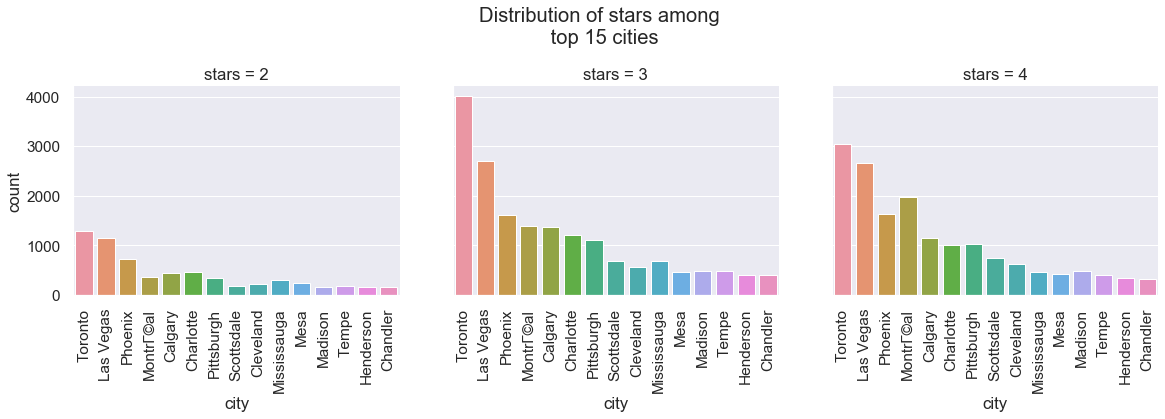

In [24]:
top_15_cities_234_stars = top_15_cities_by_stars[top_15_cities_by_stars.stars.isin ([2,3,4])]

fig = plt.figure()
chart_cit = sns.catplot(data =  top_15_cities_234_stars, x = 'city',col= 'stars' , kind ='count', aspect = 1.1, height = 5).set_xticklabels(rotation=90)
chart_cit.fig.suptitle('Distribution of stars among \n top 15 cities')
plt.subplots_adjust(top=0.76)

In [25]:
rest_df[rest_df.city == 'MontrГ©al'][['city', 'postal_code']].sample()

,city,postal_code
7626,MontrГ©al,H9H 2S6


For the majority of towns the star rates are distributed quite normally, however there are few locations, that will be marked for further discoveries. The first is "Toronto", because it has most of the business units and taking first position in all three charts. The second is 'Las Vegas', not only because it has grabbed the second place, but rather because the star rates are a bit left skewed as 3 and 4 stars are almost at the same level. By the same reason our third component would be 'MontrГ©al', which stands for Canada's province - Montreal. In this city 4 stars are dominating. 

It would be also interesting to see, if level of star rate creates the favorable environment for business running and entrepreneurs could feel safe themselves from bankruptcy. For these purposes we will compare mean star rates with open and closed businesses within each location from our top 15 list.

In [26]:
city_open_df = rest_df.groupby('city')['is_open'].value_counts().unstack().fillna(0)
city_open_df.sample()

is_open,0,1
city,,
Joliette,0.0,4.0


In [27]:
#city_open_df.reset_index()
city_open_df = city_open_df.reset_index()
city_open_df.columns = ['city', 'closed', 'open']
city_open_df['total_units'] = city_open_df.open + city_open_df.closed
city_open_df['ratio_%'] = round((city_open_df.open-city_open_df.closed)/(city_open_df.open+city_open_df.closed)*100)
#city_open_df.sort_values(by = (['open', 'ratio_%'])   , ascending = [False, True])

In [28]:
print(city_open_df.shape)
city_open_df.sample(2)

(794, 5)


,city,closed,open,total_units,ratio_%
534,Plum Boro,0.0,1.0,1.0,100.0
2,Ahwatukee,1.0,4.0,5.0,60.0


Above is the sample data frame represents all locations from our dataset, amounts of open and closed businesses and total amount of units within each city. The final feture called 'ratio_%' stands for the % coefficient of open and closed businesses calculated by formula: ((open_businesses - closed_businesses)/(open_businesses + closed_businesses))*100. 

Now is time to limit new data frame to all locations that have more then 500 units in total and plot these out.

In [29]:
city_open_df.sort_values(by = 'open', ascending = False)
#city_open_df_500 = city_open_df
city_open_df_500 = city_open_df[city_open_df.open + city_open_df.closed >500].sort_values(by = (['total_units', 'ratio_%'])   , ascending = [False, False]) #(by= 'ratio_%', ascending = False)
city_open_df_500_star_means = rest_df [rest_df.city.isin (city_open_df_500.city.unique())].groupby('city')['stars'].mean().to_frame().reset_index()
city_open_df_500_star_means['stars'] = round(city_open_df_500_star_means['stars'], 1)
city_open_df_500_star_means.columns = ['city','star_means']
city_open_df_500 = city_open_df_500.merge(city_open_df_500_star_means, left_on = 'city', right_on = 'city' )
#city_open_df_500[(city_open_df_500.star_means == city_open_df_500.star_means.min()) | (city_open_df_500.star_means == city_open_df_500.star_means.max()) ][['open', 'closed','total_units','star_means']]#.corr()

In [30]:
print(city_open_df_500.shape)
city_open_df_500.sample(3)

(21, 6)


,city,closed,open,total_units,ratio_%,star_means
20,Scarborough,129.0,398.0,527.0,51.0,3.0
17,Gilbert,181.0,446.0,627.0,42.0,3.2
6,Pittsburgh,779.0,1812.0,2591.0,40.0,3.3


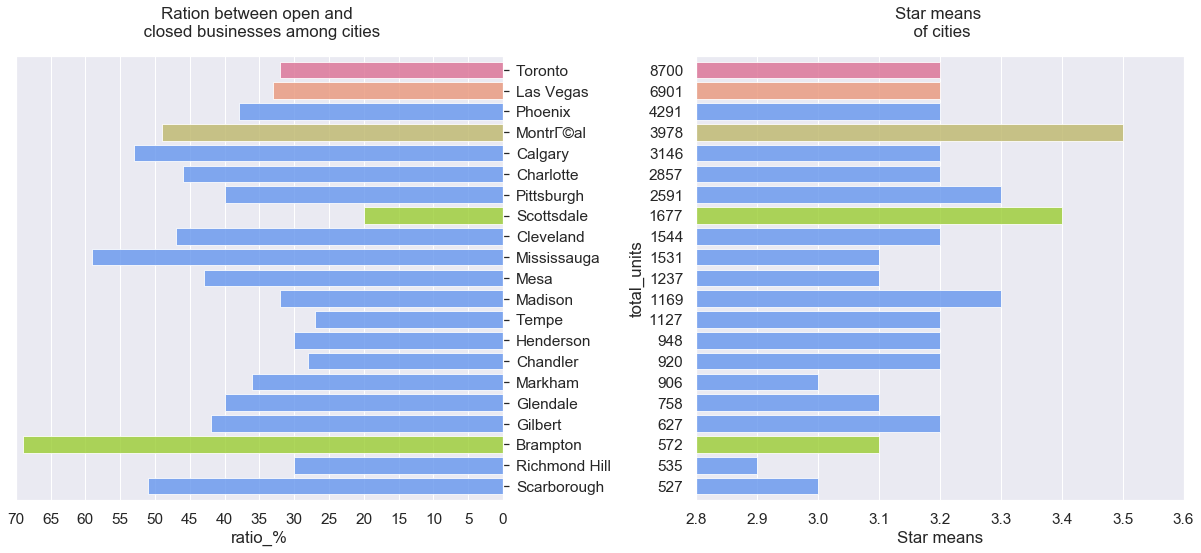

In [31]:
city_open_df_500['total_units'] = city_open_df_500['total_units'].astype(int)
city_open_df_500 = city_open_df_500.sort_values(by = 'total_units', ascending = True)

colors = ['palevioletred' if x== 'Toronto' else 'darksalmon' if x == 'Las Vegas' else 'darkkhaki' if x =='MontrГ©al' 
          else 'yellowgreen' if x in (['Scottsdale', 'Brampton']) else 'cornflowerblue'   for x in city_open_df_500.set_index('city').index ]


f, ax = plt.subplots(2,2,figsize =(17,8))


alpha = 0.8
width = 0.8

plt.subplot(1,2,1)  
df1 = city_open_df_500.set_index('city')['ratio_%']
ax = df1.plot.barh(alpha = alpha, width = width, colors = colors)#.invert_xaxis()#.yaxis().tick_right()#(legend = False)
plt.title(f'Ration between open and \n closed businesses among cities',pad = 20)
plt.xticks(np.arange(0,75,5))
plt.xlim(0,70)
plt.ylabel('')
plt.grid(axis = 'y')
plt.xlabel('ratio_%')
plt.subplot(1,2,2)
ax.invert_xaxis()
ax.yaxis.tick_right()

df2 = city_open_df_500.set_index('total_units')['star_means']
df2.plot.barh(alpha = alpha, width = width, color = colors)#(legend = False)#, position = 1)
plt.title(f'Star means \n of cities', pad = 20)
min_sacale = min(df2)-0.1
max_sacale = max(df2)+0.1
plt.xlim(min_sacale,max_sacale)
plt.xlabel('Star means')
plt.grid(axis = 'y')

f.tight_layout(pad = 1.1)
plt.show()

Above plot on the left side represents the ratio between open and closed businesses reaching 21 cities that has more then 500 units and on the right side is the star means rate for these locations. So higher the ratio rate - less units were closed.

'Toronto', 'Las Vegas' and 'Montreal' were marked with different color as these cities were emphasised in previous observation. So for Toronto with highest amount of units, the star means is not the max, and ratio level is around 30% which is quite low. So it is quite risky to operate restaurant business there, and Las Vegas has the similar picture. In comparison, Montreal is the winner among star means and ratio level is close to 50%, so in other words customers are more happy within this location and it is more safe to run the food spot there rather then in the above locations.

Could it be claimed that more happy customers influence the level of open and closed businesses? Well not specifically. For example, Scottsdale takes the 2nd position in star means plot and has only 20% ratio between open and closed businesses. In comparison, Brampton is being the leader on the left chart with ratio level 70% and has only 3.1 mean star rate, which is quite far from leadership position.

So, this plot is a great representation that star rate should be the main criteria for deciding weather one or another location is good for opening the business. However before warping up this discussion it is worth to check the correlation between star rates and open and closed businesses for the whole population.

In [36]:
city_whole_population = city_open_df[['city', 'closed', 'open']]
city_whole_population_star_means = rest_df.groupby('city')['stars'].mean().to_frame().reset_index()
city_whole_population_star_means.columns = ['city','star_means']
city_whole_population = city_whole_population.merge(city_whole_population_star_means, left_on = 'city', right_on = 'city' )

city_whole_population.columns = ['city','closed','open', 'star_means']

print(city_whole_population.shape)
print(city_whole_population.sample(2))
city_whole_population[['closed','open', 'star_means']].corr()

(794, 4)
               city  closed  open  star_means
323     Les CГЁdres     0.0   1.0         4.0
464  North Olmstead     0.0   2.0         3.0


,closed,open,star_means
closed,1.000000,0.984616,-0.013677
open,0.984616,1.000000,-0.017300
star_means,-0.013677,-0.017300,1.000000


And again, above conclusion is confirmed. The amount of either open or closed businesses does not influence the star mean rate.

### Category 

In the final chapter we will briefly go through restaurants' categories.

Coming back to the beginning of this research, RestaurantsPriceRange2 column was emphasised. It will be also concidered in categories exploration. Plus traditionally, the star rate will be compared as well. 

Before the study processing, there is a need to make some data manipulations under category feature and finally to get a correlation matrix of our categories and see how it influences the price and star rate.

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
rest_t = work_df

In [55]:
# Cretaing function, that will make some cleaning under category feature
def transfor(stri):
    txt_out = stri.replace(', ', '|')
    return txt_out
rest_t.cat_clean = rest_t.cat_clean.apply(transfor)
cat_dum = rest_t.cat_clean.str.get_dummies()

In [68]:
# Creating data frame which is the mixture of stars and price range with top 150 categories based on count aggregation
filt_col_names_cat_dum = cat_dum.sum().sort_values(ascending = False).head(150).index
me_cat_stars_price = pd.merge(work_df[['business_id','stars', 'RestaurantsPriceRange2', ]],cat_dum[filt_col_names_cat_dum], left_index=True, right_index = True)
me_cat_stars_price.shape

(39249, 153)

In [69]:
me_cat_stars_price.head()

,business_id,stars,RestaurantsPriceRange2,restaurants,food,nightlife,bars,american (traditional),sandwiches,fast food,...,polish,seafood markets,do-it-yourself food,kebab,cuban,bed & breakfast,pan asian,pasta shops,pool halls,moroccan
0,QXAEGFB4oINsVuTFxEYKFQ,2,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gnKjwL_1w79qoiV3IC_xQQ,4,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1Dfx3zM-rW4n-31KeC8sJg,3,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,fweCYi8FmbJXHCqLnwuk8w,4,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PZ-LZzSlhSe9utkQYU8pFg,4,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Creating correlation matrix which will have only interesting values - all values with corr. coefficient more than |0.3|
corr_cat = me_cat_stars_price.corr()

corr_cat_new = corr_cat[(corr_cat>0.3) | (corr_cat<-0.3) ]
corr_cat_new = corr_cat_new[corr_cat_new !=1].dropna(how= 'all', axis = 1).dropna(how='all', axis = 0)

matrix_with_interesting_values_cat = corr_cat_new[corr_cat_new != 1].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)#.fillna('')
masky_cat  = np.tril(matrix_with_interesting_values_cat)
cor_up_mat_cat = pd.DataFrame(data = masky_cat, columns = matrix_with_interesting_values_cat.columns, index = matrix_with_interesting_values_cat.index )
cor_up_mat_cat = cor_up_mat_cat[cor_up_mat_cat != 0].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)#.fillna('')

In [66]:
print('First part of correlation table')
print(cor_up_mat_cat.shape)
cor_up_mat_cat_part1 = round(cor_up_mat_cat.iloc[:, :10],2).dropna(how='all', axis = 0).fillna('')
cor_up_mat_cat_part1

First part of correlation table
(31, 22)


,RestaurantsPriceRange2,food,nightlife,bars,sandwiches,pizza,mexican,coffee & tea,japanese,event planning & services
bars,,,0.98,,,,,,,
fast food,-0.31,,,,,,,,,
italian,,,,,,0.37,,,,
coffee & tea,,0.43,,,,,,,,
cafes,,,,,,,,0.35,,
sushi bars,,,,,,,,,0.6,
sports bars,,,0.43,0.44,,,,,,
delis,,,,,0.3,,,,,
specialty food,,0.33,,,,,,,,
caterers,,,,,,,,,,0.83


In [49]:
print('Second part of correlation table')
print(cor_up_mat_cat.shape)
round(cor_up_mat_cat.iloc[:, 10:],2).dropna(how='all', axis = 0).fillna('')

Second part of correlation table
(31, 22)


,specialty food,mediterranean,indian,vegetarian,middle eastern,arts & entertainment,ethnic food,hawaiian,food trucks,hotels & travel,irish,hotels
middle eastern,,0.38,,,,,,,,,,
greek,,0.41,,,,,,,,,,
vegan,,,,0.41,,,,,,,,
ethnic food,0.68,,,,,,,,,,,
pakistani,,,0.52,,,,,,,,,
music venues,,,,,,0.65,,,,,,
imported food,0.36,,,,,,0.52,,,,,
hotels,,,,,,,,,,0.82,,
casinos,,,,,,0.43,,,,0.37,,0.42
lebanese,,,,,0.38,,,,,,,


Above are two parts of our correlation matrix dataframe with values more then absolute 0.3. Not much I would say. Mostly, it contains the obvious relations such as most businesses with 'bars' option also provide with 'nightlife' and etc. The only interesting, however not 'oh my god!' aspect is that 'fast food' category has a negative correlation to price range with -0.31 score, which means that attendance of food spots in this sector tend to be a bit cheaper.

However, it is worth to mention that there is no 'stars' feature present in the table. It means that categories do not influence the star rate. But still let's take a look on max and min corr. coefficient of 'stars'.

In [51]:
corr_star = corr_cat[corr_cat.stars<1]
corr_star = corr_star.filter(items = ['stars'], axis = 1)
print('Max value for stars in correlation table')
print(corr_star[corr_star == corr_star.max()].dropna())
print('\n')
print('Min value for stars in correlation table')
print(corr_star[corr_star == corr_star.min()].dropna())

Max value for stars in correlation table
          stars
cafes  0.097011


Min value for stars in correlation table
             stars
fast food -0.27048


The max value is pretty low and there is nothing to do with it. The min is a bit more interesting compare to max. It reaches the correlation score around -0.3 with 'fast food'. 

So from this short observation, we could state that fast food compare to other category representations tend to be less expensive and gets less star rates as well.

## Conclusion 

The purpose of this study was to find out how star rate is important for businesses in Restaurant&Cafe industry.

Before making the final conclusion, lets go through the study's bullet points:
1. From extracted attributes it was found out that 'royal' food spots, that require formal dress, does not have 'food-take-away' option, not good for kids and have the reservation option - have a positive relationship between price range and star rates. In other words, more expensive 'royal' restaurant is - higher star rate.
2. Brands that has around less then 100 business units tend to get higher star rates with average score equal to 4, then those with bigger units amount.
3. Star rate does not appear as a cause of business unit closure. 
4. Location and star rates are also not tight to each other in terms of the whole population. 
5. From the perspective of the restaurant category, fast food tends to be less expensive and correspondingly receives less star rates.

The star rate does influence the businesses in the food industry in some clusters, however not fundamentally. For example, as it was mentioned in the insights, the 'royal' segment has some positive correlation between the price range and stars. On the opposite, non-royal food spots with average only 3 stars does not suffer from that. Moreover, as open and closed businesses observation from the brand and location perspective showed that low star rate is not the cause of spot closure.

To conclude, study showed the star rate is not the fundamental part that determines the success in Restaurant&Cafe industry and it should not be considered as the key factor in business decision-making process. 